In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import folium

import json
from pathlib import Path
import pymap3d
from datetime import datetime

import pandas as pd

In [2]:
import os
os.environ["PYTHONPATH"]

'D:/projects/PTETA'

In [2]:
# f_path = Path('../data/routes/chernivtsi/eway/trolbus/trolbus_11.json')
f_path = Path('../data/routes/chernivtsi/eway/bus/bus_11.json')


with open(str(f_path), 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['general', 'stops', 'scheme', 'begin', 'end', 'intervals'])

In [3]:
m = folium.Map(
    location=np.mean([[p['x'], p['y']]for p in data['stops']['forward']], axis=0), 
    zoom_start=12, height='90%', width='55%'
    )

for coord in data['stops']['forward']:
    folium.Circle(
        location=[ coord['x'], coord['y'] ], fill_color='#43d9de', 
        radius=16, popup=f"{coord['i']}) {coord['n']}"
    ).add_to( m )
    
folium.PolyLine(
    locations=[[float(l) for l in p.split(',')] 
               for p in data['scheme']['forward'].split(' ')], 
    color='#43d9de'
    ).add_to( m )
    
# for coord in data['stops']['backward']:
#     folium.Circle(location=[ coord['x'], coord['y'] ], 
#                   fill_color='green', 
#                   radius=8,
#                  popup=f"{coord['i']}) {coord['n']}"
#                  ).add_to( m )
# folium.PolyLine(
#     locations=[[float(l) for l in p.split(',')] 
#                for p in data['scheme']['backward'].split(' ')], 
#     color='green'
#     ).add_to( m )

m

In [4]:
forward_route = [[float(l) for l in p.split(',')] 
                 for p in data['scheme']['forward'].split(' ')]
forward_route_np = np.array(forward_route)

CHERNIVTSI_CENTER = np.array([48.3, 25.933333])
CHERNIVTSI_CENTER, forward_route_np.shape

(array([48.3     , 25.933333]), (256, 2))

In [5]:
from PTETA.utils.TrackENU import TrackENU        
        
r = TrackENU(forward_route_np, CHERNIVTSI_CENTER)
len(r), r.track_enu.shape, r.track_geod.shape, forward_route_np.shape

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [43]:
r.convert_to_enu(gps_data[:, :2])
# r.convert_to_geod(gps_data[:, :2])

array([[ 1616343.19399388,     5802.78243539],
       [  234473.18425715, -2413884.75472298]])

In [6]:
r.track_geod

NameError: name 'r' is not defined

In [7]:
mx_dist = 50

m = folium.Map(
    location=np.mean([[p['x'], p['y']]for p in data['stops']['forward']], axis=0), 
    zoom_start=12, height='90%', width='55%'
    )

opt_route = r.track_geod

print(f"{opt_route.shape} - {r.track_enu.shape}")
    
for coord in opt_route:
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='blue', 
                  radius=4,
                 ).add_to( m )
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='green', 
                  radius=mx_dist,
                 ).add_to( m )
    
for coord in forward_route_np:
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='red', 
                  radius=1,
                 ).add_to( m )
# folium.PolyLine(
#     locations=r.convert_to_geod(opt_route), 
# #     locations=opt_route,
#     color='red'
# #     ).add_to( m )

folium.PolyLine(
    locations=r.track_geod, axis=0,
    color='green'
    ).add_to( m )

# {'proj_vec': array([39.40816411, 11.59206913]), 
#  'proj_length': 41.07772467940181, 
#  'tang_vec': array([  541.09231224, -1839.48649707]), 
#  'distance_to_line': 1917.417915656256, 
#  'proj_point': array([-413.97598403, 1888.60396833])}

for seg_n, _ in enumerate(r.unit_vec):
    res = r.get_proj_on_seg_data(seg_n, CHERNIVTSI_CENTER)
    if res is not None:
#         print(f"{seg_n:03}) {res}")
        folium.PolyLine(
            locations=r.convert_to_geod(np.vstack([res['proj_point'], CHERNIVTSI_CENTER])), 
            color='orange'
        ).add_to(m)

m

(228, 2) - (228, 2)


In [8]:
r.get_proj_on_track(CHERNIVTSI_CENTER)

{'segment_projection': {'proj_vec': array([-21.02849539,  12.86515633]),
  'proj_length': 24.651772063501046,
  'tang_vec': array([38.77126339, 63.37282754]),
  'distance_to_line': 74.29216739280287,
  'proj_point': array([  9.52873661, -37.43949454]),
  'progress': 9372.396062267984,
  'segment_number': 182},
 'optimal_point_dist': {'point_number': 183,
  'dist_to_point': 76.90600224864839,
  'progress': 9392.27587730608},
 'track_bounds_dist': {'start': 5207.455810305489, 'end': 810.1223530386083}}

In [377]:
# [p for p in Path("../data/local/tables/data_for_03_OCT_2022.csv").iterdir() ]

In [10]:
df = pd.read_csv("../data/local/tables/data_for_17_OCT_2022.csv")

In [21]:
# df

In [11]:
# li = []

# for filename in [p for p in Path("../data/local/tables").iterdir()][-10:]:
#     df = pd.read_csv(filename)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [13]:
# df[df['routeName'] == '20'][['id', 'imei', 'name', 'routeName']].value_counts()

In [14]:
df[(df['routeName'] == "11")| (df['routeName'] == "11/3") ][['imei', 'routeName']].value_counts()

imei             routeName
355227046453528  11           3928
355227046451027  11           3574
355227045540572  11           2800
355227045541208  11            810
355227046451332  11              1
dtype: int64

In [15]:
df[df['imei'] == 355227046453528]

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
3782,326,355227046453528,H8,used,used,48.322998,25.933548,0.0,0.00,2022-10-17 05:08:58,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4466,326,355227046453528,H8,used,used,48.323095,25.933523,0.0,0.00,2022-10-17 05:13:09,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4526,326,355227046453528,H8,used,used,48.323100,25.933523,0.0,0.00,2022-10-17 05:13:29,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4555,326,355227046453528,H8,used,used,48.323110,25.933523,0.0,0.00,2022-10-17 05:13:39,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4584,326,355227046453528,H8,used,used,48.323115,25.933525,0.0,0.00,2022-10-17 05:13:49,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254640,326,355227046453528,H8,used,used,48.324377,25.933650,7.0,19.34,2022-10-17 20:13:05,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254655,326,355227046453528,H8,used,used,48.324395,25.933728,0.0,108.54,2022-10-17 20:13:11,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254680,326,355227046453528,H8,used,used,48.324363,25.933623,2.4,108.54,2022-10-17 20:13:22,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254710,326,355227046453528,H8,used,used,48.324360,25.933598,0.0,108.54,2022-10-17 20:13:32,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0


In [16]:
def rgb_to_hex(r, g, b):
    return f'{r:02x}{g:02x}{b:02x}'


def plot_coloured_route(route, folium_map, color_map=mpl.cm.get_cmap('jet'), bins=10):
    bins = min(bins, len(route))
    
    lspace = np.linspace(0, len(route), num=bins+1, dtype=int)
    
    for i, (lb, rb) in enumerate(zip(lspace[:-1], lspace[1:]) ):
        clr = rgb_to_hex(*tuple(map(lambda x : int(x*255), color_map(i/bins) ))[:3])
        folium.PolyLine(
            route[lb:rb+1, :],
            color=f"#{clr}", weight=2,
            opacity=0.8
        ).add_to(folium_map)

In [ ]:
355227046453528  11           4240
355227045540192  11           3539
355227045540572  11           3225
355227046451167  11           2981
355227045600178  11/3         2825
355227045541208  11            810
355227045541257  11            370
355227045598570  11            188
355227044854818  11             96
355227045369527  11             57

In [ ]:
355227046453528  11           3928
355227046451027  11           3574
355227045540572  11           2800
355227045541208  11            810
355227046451332  11              1

In [17]:
# updata_tm = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in sum_df['gpstime'].unique() ]
# updata_tm_np = np.array(updata_tm)

gps_data = df[df['imei'] == 355227045600178][['lat', 'lng', 'gpstime']].values
gps_data[:, 2] = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in gps_data[:, 2] ]
gps_data = gps_data.astype(float)

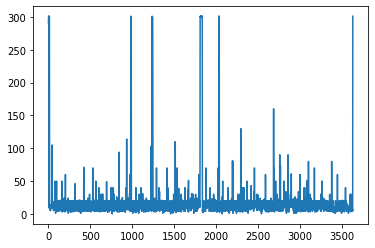

In [18]:
plt.plot(np.diff(gps_data[:, 2]))

In [19]:
np.diff(gps_data[:, 2])[np.diff(gps_data[:, 2]) <= 0 ]

array([0., 0.])

In [19]:
trace = gps_data[:, :2]

m = folium.Map(
    location=np.mean(trace, axis=0), 
    zoom_start=12, height='50%', width='55%'
    )

plot_coloured_route(trace, m)

m

In [22]:
import time

In [23]:
from tqdm import tqdm

In [20]:
# r.convert_to_enu(gps_data[:, :2])
r.convert_to_enu(gps_data [0, :2])

array([ 4302.63406435, -3748.82497236])

In [33]:
gps_data [0, :2]

array([48.26635167, 25.99187833])

In [24]:
dists = [None] * len(gps_data)

st = time.perf_counter()

for i, coord in tqdm(enumerate(gps_data[:, :2])):
    dists[i] = r.get_proj_on_track(r.convert_to_enu(coord))

end = time.perf_counter()
print(f"{end - st}")

3635it [00:03, 1194.55it/s]

3.063525199999958


In [25]:
dists[1222]

{'segment_projection': None,
 'optimal_point_dist': {'point_number': 203,
  'dist_to_point': 4471.2863891953375,
  'progress': 10293.008254894577},
 'track_bounds_dist': {'start': 10443.046864799073, 'end': 4887.433072077711}}

In [26]:
[r['optimal_point_dist'] for r in dists[2000:2005]]

[{'point_number': 203,
  'dist_to_point': 3791.4142338874362,
  'progress': 10293.008254894577},
 {'point_number': 203,
  'dist_to_point': 3809.8609885347682,
  'progress': 10293.008254894577},
 {'point_number': 203,
  'dist_to_point': 3831.2932449226605,
  'progress': 10293.008254894577},
 {'point_number': 203,
  'dist_to_point': 3853.383812847649,
  'progress': 10293.008254894577},
 {'point_number': 203,
  'dist_to_point': 3867.0054439627984,
  'progress': 10293.008254894577}]

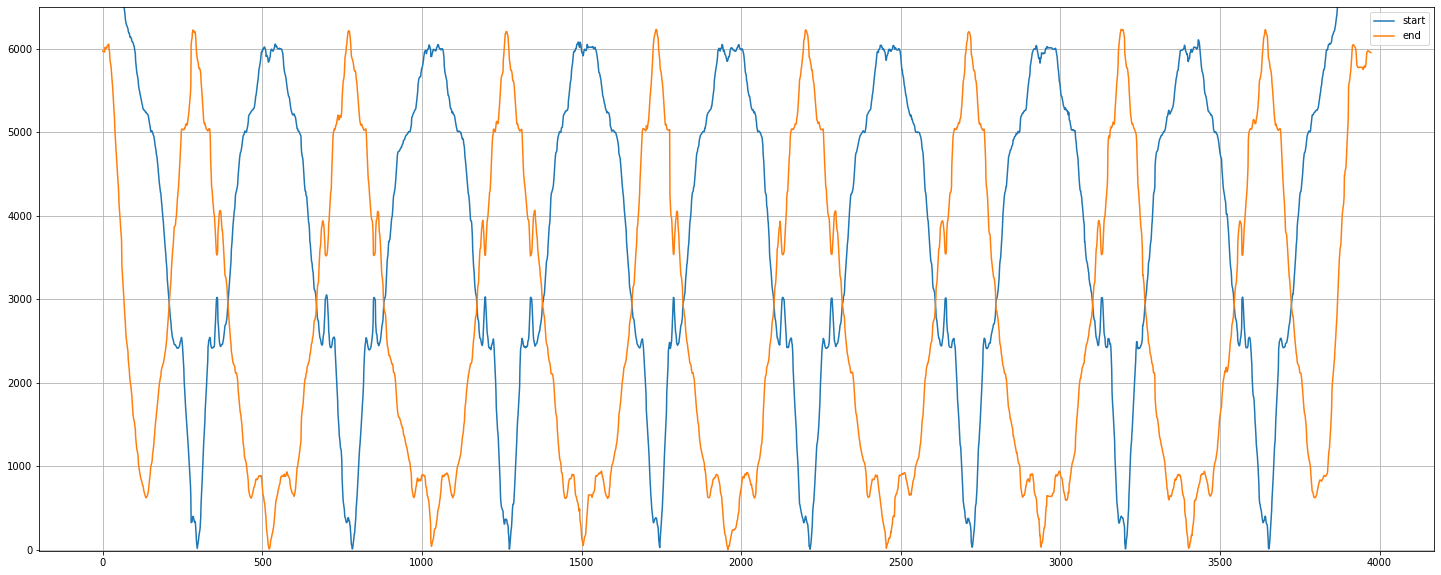

In [28]:
plt.figure(figsize=(25, 10))
plt.plot([r['track_bounds_dist']['start'] for r in dists], label='start')
plt.plot([r['track_bounds_dist']['end'] for r in dists], label='end')
plt.ylim(-10, 6500)
plt.legend()
plt.grid()

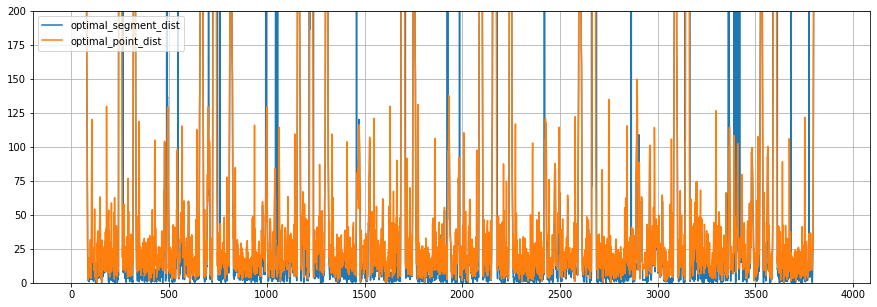

In [29]:
plt.figure(figsize=(15, 5))
lb, rb = 0, -1
plt.plot([r['segment_projection']['distance_to_line'] 
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "optimal_segment_dist")
plt.plot([r['optimal_point_dist']['dist_to_point'] 
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "optimal_point_dist")
plt.ylim(0, 200)

plt.grid()
plt.legend()

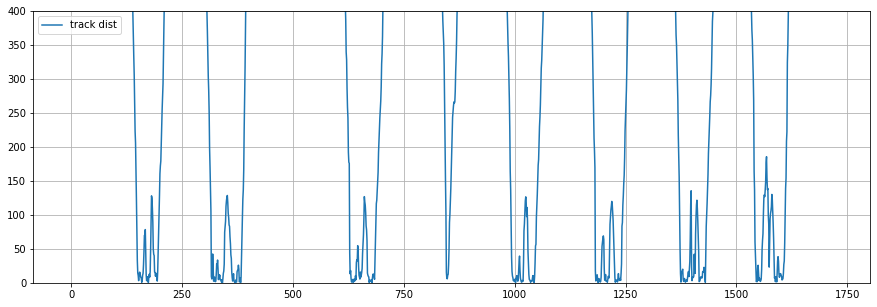

In [27]:
plt.figure(figsize=(15, 5))
lb, rb = 0, -1
plt.plot([min(r['segment_projection']['distance_to_line'], 
              r['optimal_point_dist']['dist_to_point']  )
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "track dist")
# plt.plot([r['optimal_point_dist']['dist_to_point'] 
#           for r in dists[lb:rb] if r['segment_projection'] is not None], 
#         label = "optimal_point_dist")
plt.ylim(0, 400)

plt.grid()
plt.legend()

In [37]:
def convert2geod(coord_geod: np.array) -> np.array:
        res = pymap3d.enu2geodetic(
            e=coord_geod[:, 0],
            n=coord_geod[:, 1],
            u=np.zeros_like(coord_geod[:, 0]),
            lat0=CHERNIVTSI_CENTER[0],
            lon0=CHERNIVTSI_CENTER[1],
            h0=0, deg=True
        )

        return np.dstack([res[0], res[1]])[0]

In [40]:
# r.convert_to_enu(gps_data[:, :2])
r.convert_to_geod(gps_data[:, :2])

array([[48.30023374, 25.93398356],
       [48.30023374, 25.93398356],
       [48.30023374, 25.93398356],
       ...,
       [48.30023374, 25.93398357],
       [48.30023374, 25.93398356],
       [48.30023374, 25.93398356]])

In [33]:
gps_data[:, :2]

array([[48.26627167, 25.99128833],
       [48.26627167, 25.99128833],
       [48.26627167, 25.99128833],
       ...,
       [48.26629333, 25.991265  ],
       [48.26625167, 25.99136167],
       [48.26625167, 25.99136167]])